### 🎯 **Goal**:

Learn to make linear regression faster and more powerful by using **multiple features** instead of just one.

---

### 🏠 **Univariate Linear Regression (Single Feature)**:

* Model:

  $$
  f_{w,b}(x) = wx + b
  $$
* Example: Predicting house price using only **size**.

---

### 🧮 **Multiple Linear Regression**:

* Use **multiple input features** like:

  * Size of the house (X₁)
  * Number of bedrooms (X₂)
  * Number of floors (X₃)
  * Age of the home (X₄)



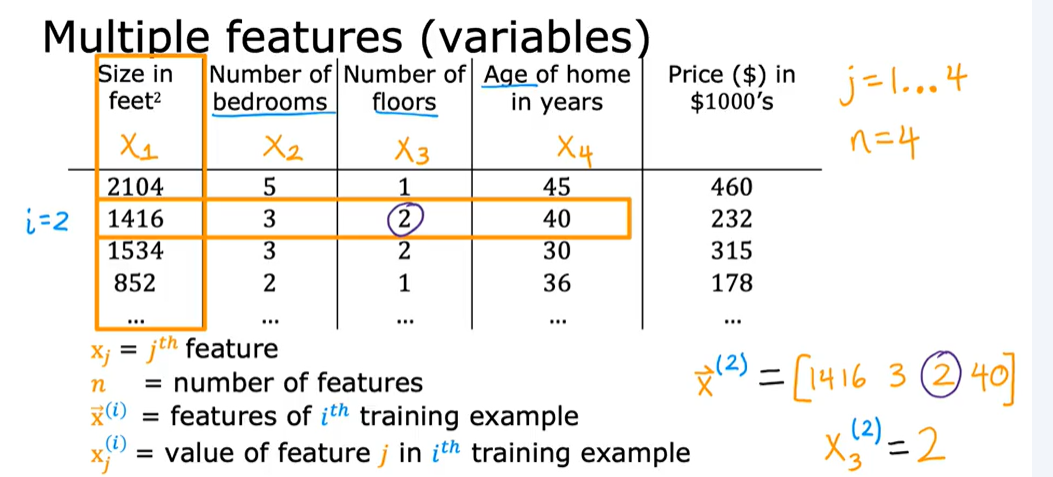



* Model becomes:

  $$
  f_{w,b}(x) = w_1x_1 + w_2x_2 + w_3x_3 + w_4x_4 + b
  $$

* Generalized for **n features**:

  $$
  f_{w,b}(x) = w_1x_1 + w_2x_2 + \ldots + w_nx_n + b
  $$

---

### ✍️ **Notation**:

* $x^{(i)}$: Feature vector for the *i-th* training example
* $x_j$: The *j-th* feature
* $x^{(i)}_j$: *j-th feature of the i-th example*
* $\vec{w}$: Vector of weights $[w_1, w_2, \ldots, w_n]$
* $\vec{x}$: Vector of input features $[x_1, x_2, \ldots, x_n]$

---

### 🔁 **Compact Vector Notation**:

* Use the **dot product**:

  $$
  f_{w,b}(x) = \vec{w} \cdot \vec{x} + b
  $$
* Dot product:

  $$
  \vec{w} \cdot \vec{x} = w_1x_1 + w_2x_2 + \ldots + w_nx_n
  $$

---

### 📌 **Terminology**:

* This model is called **multiple linear regression**
* Don't confuse with **multivariate regression**, which refers to predicting multiple outputs (not discussed here)


### ⚡️ **What Is Vectorization?**

* A technique to **write cleaner, shorter, and faster code**.
* Makes use of optimized **numerical libraries** like **NumPy**.
* Allows your code to leverage **parallel hardware** (CPU/GPU), improving efficiency.

---

### 💻 **Why Use Vectorization?**

1. **Code is shorter and easier to read**.
2. **Runs significantly faster**, especially for large-scale problems (e.g., with 100,000 features).

---

### 📊 **Example Scenario**:

* You have:

  * A **weight vector** $\vec{w} = [w_1, w_2, w_3]$
  * A **feature vector** $\vec{x} = [x_1, x_2, x_3]$
  * A **bias** $b$
* Goal: Compute prediction

  $$
  f = \vec{w} \cdot \vec{x} + b
  $$

---

### 🐍 **Implementations in Python**:

#### 1. **Manual computation (inefficient)**:

```python
f = w[0]*x[0] + w[1]*x[1] + w[2]*x[2] + b
```

* Doesn’t scale when `n` is large.

#### 2. **Using a `for` loop (still not vectorized)**:

```python
f = 0
for j in range(n):
    f += w[j] * x[j]
f += b
```

* Better than manual, but still **sequential** and not efficient.

#### 3. **Using vectorization (best)**:

```python
f = np.dot(w, x) + b
```

* **One line**, **fast**, and **clean**.
* `np.dot()` is optimized to use **parallel computation**.

---

### 🧠 **Why Is It Faster?**

* `np.dot()` uses **parallel hardware** (CPU/GPU).
* Efficient under-the-hood implementations reduce computation time.


## 🚀 **Why Vectorization Feels Like a Magic Trick**

* Vectorization dramatically speeds up code execution.
* Instead of executing one operation at a time (sequential), your computer can perform many operations **in parallel** using optimized **hardware and libraries** like **NumPy**.

---

## 🐢 **Without Vectorization (Sequential Execution)**

* For loops execute one step at a time:

  * Time `t0`: compute `w[0] * x[0]`
  * Time `t1`: compute `w[1] * x[1]`
  * ...
  * Time `t15`: compute `w[15] * x[15]`
* Takes **16 steps** to multiply and another **15 steps** to add up results.

---

## 🐇 **With Vectorization (Parallel Execution)**

* All multiplications (e.g., `w[j] * x[j]`) happen **simultaneously**.
* Specialized hardware adds all products efficiently in parallel.
* Much faster, especially when **number of features is large** (e.g., 1000+).

---

## 📘 **Example: Updating Parameters in Linear Regression**

### Task:

Update each weight $w_j$ using gradient descent:

$$
w_j = w_j - \alpha \cdot d_j
$$

Where:

* $\alpha$: learning rate
* $d_j$: derivative (gradient) for $w_j$

### 🔸 Without Vectorization:

```python
for j in range(16):
    w[j] = w[j] - 0.1 * d[j]
```

### 🔹 With Vectorization (Much Faster):

```python
w = w - 0.1 * d
```

* All 16 updates are computed **at once** using **NumPy's parallel hardware support**.

---

## 🧠 **Behind the Scenes**

* NumPy arrays (`w`, `d`) allow fast operations.
* `np.dot()` and element-wise operations utilize **parallel processing** (CPU & GPU).
* Makes **large-scale training practical** in modern ML.

---

## 🧪 **Optional Lab: Practice with NumPy**

* Learn:

  * How to create **NumPy arrays** (vectors)
  * How to compute **dot products** using `np.dot()`
  * How to **time** your code to compare for-loops vs vectorized versions
* Don’t worry about understanding all syntax at once; use it as a **reference**.

---

## ✅ **Key Takeaways**

* Vectorization:

  * Makes code **shorter**
  * Makes execution **much faster**
  * Scales well with **large datasets and models**
* Core to writing efficient **machine learning** implementations



That’s a great summary! Let’s extract and clarify the **key concepts** from this and **connect the dots** for better understanding — especially focusing on vectorization and gradient descent in **multiple linear regression**.

---

### 🔢 Multiple Linear Regression in Vector Notation

Instead of writing:

$$
f(x) = w_1x_1 + w_2x_2 + \dots + w_nx_n + b
$$

We write this compactly using **vector notation**:

$$
f(\vec{x}) = \vec{w} \cdot \vec{x} + b
$$

Where:

* $\vec{w} = [w_1, w_2, \dots, w_n]^T$
* $\vec{x} = [x_1, x_2, \dots, x_n]^T$
* $\vec{w} \cdot \vec{x} = \sum_{j=1}^{n} w_j x_j$

---

### 🎯 Cost Function $J(\vec{w}, b)$

For $m$ training examples $(\vec{x}^{(i)}, y^{(i)})$, the cost function becomes:

$$
J(\vec{w}, b) = \frac{1}{2m} \sum_{i=1}^m \left( \vec{w} \cdot \vec{x}^{(i)} + b - y^{(i)} \right)^2
$$

---

### 🔁 Gradient Descent (Vectorized Update Rules)

We want to minimize $J(\vec{w}, b)$. For that, we update:

#### 1. **Weights vector** $\vec{w}$:

$$
\vec{w} := \vec{w} - \alpha \cdot \frac{1}{m} \sum_{i=1}^m \left( f^{(i)} - y^{(i)} \right) \vec{x}^{(i)}
$$

This becomes very efficient using NumPy vectorization.

#### 2. **Bias** $b$:

$$
b := b - \alpha \cdot \frac{1}{m} \sum_{i=1}^m \left( f^{(i)} - y^{(i)} \right)
$$

Where $f^{(i)} = \vec{w} \cdot \vec{x}^{(i)} + b$

---

### ✅ Vectorized Python Implementation (NumPy-style)

```python
def compute_cost(X, y, w, b):
    m = X.shape[0]
    predictions = X @ w + b
    errors = predictions - y
    cost = (1 / (2 * m)) * np.dot(errors, errors)
    return cost

def compute_gradient(X, y, w, b):
    m = X.shape[0]
    predictions = X @ w + b
    errors = predictions - y
    dj_dw = (1 / m) * (X.T @ errors)
    dj_db = (1 / m) * np.sum(errors)
    return dj_dw, dj_db

def gradient_descent(X, y, w, b, alpha, iters):
    for i in range(iters):
        dj_dw, dj_db = compute_gradient(X, y, w, b)
        w = w - alpha * dj_dw
        b = b - alpha * dj_db
    return w, b
```

---

### 🧮 What is the Normal Equation?

Instead of gradient descent, we can analytically solve for $\vec{w}$:

$$
\vec{w} = (X^TX)^{-1}X^Ty
$$

No iterations required — just one matrix calculation. But:

* **Not scalable** for large feature sets (due to matrix inversion)
* **Doesn’t generalize** to models like logistic regression

---

### Summary

| Concept              | Description                                                              |
| -------------------- | ------------------------------------------------------------------------ |
| **Vectorization**    | Represents weights and inputs as vectors, enabling efficient computation |
| **Dot product**      | $\vec{w} \cdot \vec{x}$ gives the weighted sum of features               |
| **Cost function**    | Measures error between predictions and actual values                     |
| **Gradient Descent** | Iteratively updates weights and bias to minimize cost                    |
| **Normal Equation**  | Closed-form solution without iterations, but computationally expensive   |

---


Here's a **concise summary** of the passage on **multiple linear regression with gradient descent and vectorization**:

---

### 📌 **Multiple Linear Regression Recap & Vectorization**

* In multiple linear regression, we predict output using multiple features:

  $$
  f(x) = w_1x_1 + w_2x_2 + \dots + w_nx_n + b
  $$

* Instead of treating each $w_j$ individually, we group them into a **weight vector** $\vec{w}$, and express the model more compactly:

  $$
  f_{\vec{w}, b}(x) = \vec{w} \cdot \vec{x} + b
  $$

---

### 💡 **Cost Function (Vectorized Form)**

* The cost function is written as:

  $$
  J(\vec{w}, b) = \frac{1}{2m} \sum_{i=1}^{m} \left( \vec{w} \cdot \vec{x}^{(i)} + b - y^{(i)} \right)^2
  $$

---

### 🔁 **Gradient Descent for Multiple Features**

* For each iteration, update:

  * **Weights**:

    $$
    \vec{w} := \vec{w} - \alpha \cdot \frac{1}{m} \sum (f^{(i)} - y^{(i)}) \vec{x}^{(i)}
    $$
  * **Bias**:

    $$
    b := b - \alpha \cdot \frac{1}{m} \sum (f^{(i)} - y^{(i)})
    $$

* Vectorization makes these updates more efficient and concise in code.

---

### 🧠 **Normal Equation (Alternative to Gradient Descent)**

* A direct way to compute weights:

  $$
  \vec{w} = (X^TX)^{-1}X^Ty
  $$
* **Pros**: No iterations needed
* **Cons**: Slow for large feature sets and not usable for models like logistic regression or neural networks

---

### 🛠️ **Implementation Notes**

* Gradient descent is **widely used and flexible**.
* You'll practice coding this using **NumPy** in the lab.
* Choosing good values for the learning rate $\alpha$ and scaling features properly will improve performance.

---

### ✅ Takeaway

* You’ve now learned how to:

  * Represent linear regression using vector notation
  * Compute the cost function and gradients
  * Implement gradient descent efficiently using vectorized code



To improve the **efficiency of gradient descent** by applying **feature scaling**.

---

### 🏠 **Example: Predicting House Price**

* Two features:

  * $x_1$: Size in square feet (300 to 2000)
  * $x_2$: Number of bedrooms (0 to 5)

* These features have **different value ranges**:

  * $x_1$ is **large**, so its weight $w_1$ tends to be **small**
  * $x_2$ is **small**, so its weight $w_2$ tends to be **large**

---

### ⚙️ **Problem Without Feature Scaling**

* Gradient descent is affected by the **scale of features**.
* If one feature (like $x_1$) is much larger than another:

  * The **cost function contours** become elongated (elliptical).
  * Gradient descent may **zig-zag** and **converge slowly**.

---

### 📈 **Contour Plot Behavior**

* Tall and skinny ellipses indicate that:

  * Small changes in $w_1$ lead to big cost changes.
  * Large changes in $w_2$ are needed to change the cost.

---

### ✅ **Solution: Feature Scaling**

* Rescale features to take **similar ranges**, e.g., 0 to 1.
* After scaling:

  * Contours become more **circular**.
  * Gradient descent follows a **straighter, faster path** to the minimum.

---

### 🔁 **Result**

* Feature scaling helps:

  * **Balance parameter sensitivity**
  * **Speed up** convergence of gradient descent

